In [6]:
import sparsejac


In [ ]:
import jax
import jax.numpy as jnp


In [ ]:


fn = lambda x: x**2
sparsity = jax.experimental.sparse.BCOO.fromdense(jnp.eye(1000))
x = jax.random.uniform(jax.random.PRNGKey(0), shape=(1000,))

sparse_fn = jax.jit(sparsejac.jacrev(fn, sparsity))
dense_fn = jax.jit(jax.jacrev(fn))


In [2]:

assert jnp.all(sparse_fn(x).todense() == dense_fn(x))


In [3]:

%timeit sparse_fn(x).block_until_ready()
%timeit dense_fn(x).block_until_ready()

14 µs ± 674 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
184 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [32]:
import jax
from jax import numpy as jnp
from jax.experimental import sparse


def sparse_tridiagonal(n):
    # Prepare row and column indices
    main_diag = jnp.arange(n)
    off_diag = jnp.arange(n - 1)

    # Indices for main diagonal
    rows_main = main_diag
    cols_main = main_diag

    # Indices for the diagonal above the main diagonal
    rows_above = off_diag
    cols_above = off_diag + 1

    # Indices for the diagonal below the main diagonal
    rows_below = off_diag + 1
    cols_below = off_diag

    # Concatenate all indices
    rows = jnp.concatenate([rows_main, rows_above, rows_below])
    cols = jnp.concatenate([cols_main, cols_above, cols_below])

    # Combine rows and cols into a single 2D indices array
    indices = jnp.stack([rows, cols], axis=-1)

    # Create data array with ones
    data = jnp.ones_like(rows)

    # Create sparse matrix
    matrix = sparse.BCOO((data, indices), shape=(n, n))

    return matrix


# Usage:
n = 10000
tri_diag = sparse_tridiagonal(n)


In [33]:
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import numpy as np

# Convert JAX sparse matrix to Scipy sparse
data_np = np.array(tri_diag.data)
indices_np = np.array(tri_diag.indices)
shape_np = tri_diag.shape
sparse_matrix_scipy = sp.csr_matrix((data_np, (indices_np[:, 0], indices_np[:, 1])), shape=shape_np)

# Create right-hand-side vector
b = np.ones((n,))

# Solve the system
x = spla.spsolve(sparse_matrix_scipy, b)


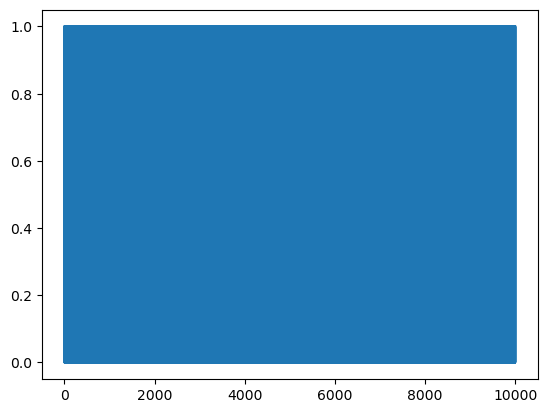

In [34]:
import matplotlib.pyplot as plt
# imshow of tri_diag
plt.plot(x)

In [8]:
data = jnp.array([1., 3., 5.])
indices = jnp.array([[0, 0],
                      [1, 1],
                      [2, 2]])
mat = sparse.BCOO((data, indices), shape=(3, 3))
mat

BCOO(float32[3, 3], nse=3)